In [51]:
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
#Load demo data

df_demo = pd.read_csv("database/df_final_demo.txt")
df_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [53]:
df_demo.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

In [54]:
#Load experiment clients

df_clients = pd.read_csv("database/df_final_experiment_clients.txt")
df_clients

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [55]:
df_clients.dtypes

client_id     int64
Variation    object
dtype: object

In [56]:
#Load web data pt1+pt2

df_web = pd.concat([
    pd.read_csv("database/df_final_web_data_pt_1.txt"),
    pd.read_csv("database/df_final_web_data_pt_2.txt")
], ignore_index=True)

df_web

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [57]:
df_web.dtypes

client_id        int64
visitor_id      object
visit_id        object
process_step    object
date_time       object
dtype: object

In [58]:
# Merge web data with experiment clients

df_analysis = df_web.merge(df_clients, on="client_id", how="left")
df_analysis


,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10,NaN
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29,NaN
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51,NaN
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34,NaN


**CLEANING 1**

In [59]:
# Analyze distribution of Variation groups

df_analysis["Variation"].value_counts(dropna=False)


Variation
NaN        434096
Test       177847
Control    143462
Name: count, dtype: int64

In [60]:
#1st : Select only experiment clients

df_analysis = df_analysis[df_analysis["Variation"].notna()]

df_analysis["Variation"].value_counts(dropna=False)

Variation
Test       177847
Control    143462
Name: count, dtype: int64

In [61]:
#Merge with demo data

df_analysis = df_analysis.merge(df_demo, on="client_id", how="left")

df_analysis

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321304,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test,10.0,121.0,55.0,U,2.0,153238.83,3.0,6.0
321305,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
321306,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
321307,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0


**CLEANING 2**

In [62]:
#check nulls in each column

df_analysis.isnull().sum()

client_id             0
visitor_id            0
visit_id              0
process_step          0
date_time             0
Variation             0
clnt_tenure_yr      102
clnt_tenure_mnth    102
clnt_age            114
gendr               102
num_accts           102
bal                 102
calls_6_mnth        102
logons_6_mnth       102
dtype: int64

In [63]:
#Drop rows with nulls in 'age' column

df_analysis = df_analysis[df_analysis["clnt_age"].notna()]
df_analysis.isnull().sum()

client_id           0
visitor_id          0
visit_id            0
process_step        0
date_time           0
Variation           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64

In [64]:
df_analysis.dtypes

client_id             int64
visitor_id           object
visit_id             object
process_step         object
date_time            object
Variation            object
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

**FORMATTING DATAFRAME**

In [65]:
#1) Convert to interger: clnt_tenure_yr, clnt_tenure_mnth, clnt_age, num_accts, bal, calls_6:mnth, logons_6_mnth

df_analysis["clnt_tenure_yr"] = df_analysis["clnt_tenure_yr"].astype(int)
df_analysis["clnt_tenure_mnth"] = df_analysis["clnt_tenure_mnth"].astype(int)
df_analysis["clnt_age"] = df_analysis["clnt_age"].astype(int)
df_analysis["num_accts"] = df_analysis["num_accts"].astype(int)
df_analysis["bal"] = df_analysis["bal"].astype(int)
df_analysis["calls_6_mnth"] = df_analysis["calls_6_mnth"].astype(int)
df_analysis["logons_6_mnth"] = df_analysis["logons_6_mnth"].astype(int)


C:\Users\marle\AppData\Local\Temp\ipykernel_30944\2075129781.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis["clnt_tenure_yr"] = df_analysis["clnt_tenure_yr"].astype(int)
C:\Users\marle\AppData\Local\Temp\ipykernel_30944\2075129781.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis["clnt_tenure_mnth"] = df_analysis["clnt_tenure_mnth"].astype(int)
C:\Users\marle\AppData\Local\Temp\ipykernel_30944\2075129781.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [66]:
#2) Convert to datetime: date_time

df_analysis["date_time"] = pd.to_datetime(df_analysis["date_time"], errors="coerce")


C:\Users\marle\AppData\Local\Temp\ipykernel_30944\2372770469.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis["date_time"] = pd.to_datetime(df_analysis["date_time"], errors="coerce")


In [67]:
df_analysis.dtypes

client_id                    int64
visitor_id                  object
visit_id                    object
process_step                object
date_time           datetime64[ns]
Variation                   object
clnt_tenure_yr               int64
clnt_tenure_mnth             int64
clnt_age                     int64
gendr                       object
num_accts                    int64
bal                          int64
calls_6_mnth                 int64
logons_6_mnth                int64
dtype: object

**DATAFRAME ORIGINAL: demo + experiment clients + web data (1-2)**

In [68]:
df_analysis

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5,64,79,U,2,189023,1,4
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5,64,79,U,2,189023,1,4
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5,64,79,U,2,189023,1,4
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5,64,79,U,2,189023,1,4
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5,64,79,U,2,189023,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321304,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test,10,121,55,U,2,153238,3,6
321305,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control,21,252,34,M,3,141808,6,9
321306,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control,21,252,34,M,3,141808,6,9
321307,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control,21,252,34,M,3,141808,6,9


In [69]:
#nunique values in each column

for col in df_analysis.columns:
    print(f"\n{col}")
    print(df_analysis[col].unique())



client_id
[9988021 8320017 4033851 ...  433098 1574008 2908510]

visitor_id
['580560515_7732621733' '39393514_33118319366' '762728880_76361333336' ...
 '5505424_50616523266' '117364417_77840596075' '814969699_90652851448']

visit_id
['781255054_21935453173_531117' '960651974_70596002104_312201'
 '949661017_22392791362_127391' ... '412278907_8949064401_171038'
 '528720790_71583064618_169151' '562606085_36368381773_92090']

process_step
['step_3' 'step_2' 'step_1' 'start' 'confirm']

date_time
<DatetimeArray>
['2017-04-17 15:27:07', '2017-04-17 15:26:51', '2017-04-17 15:19:22',
 '2017-04-17 15:19:13', '2017-04-17 15:18:04', '2017-04-17 15:17:15',
 '2017-04-17 15:17:01', '2017-04-17 15:16:22', '2017-04-05 13:10:05',
 '2017-04-05 13:09:43',
 ...
 '2017-05-20 23:07:09', '2017-05-06 23:51:05', '2017-05-06 23:50:40',
 '2017-05-06 23:43:47', '2017-05-06 23:43:34', '2017-05-06 23:43:27',
 '2017-05-10 22:57:17', '2017-05-10 22:56:31', '2017-05-10 22:56:23',
 '2017-05-10 22:56:20']
Length: 28325

**CLEANING 3 - Remove duplicated "confirm"**

In [70]:
#Check how many 'confirm' process steps per visit_id

df_analysis[df_analysis["process_step"] == "confirm"] \
    .groupby("visit_id") \
    .size() \
    .sort_values(ascending=False) 


visit_id
115772476_64303792531_611679    16
817562193_57472961580_383121    16
155305468_93296256914_310722    11
820090283_58581376462_851669    10
98898082_53766652112_934197      9
                                ..
100608591_65788886975_921579     1
10056419_61656665964_803695      1
100559681_42553631610_873319     1
999971096_28827267783_236076     1
999891710_95999857132_598498     1
Length: 37667, dtype: int64

In [71]:
#Create mask for 'confirm' process step
mask_confirm = df_analysis["process_step"].eq("confirm")

In [72]:
df_analysis_original = df_analysis.copy()

In [73]:
# 1) visit_id con confirm duplicado
visits_with_dup_confirm = (
    df_analysis.loc[mask_confirm]
    .groupby("visit_id")
    .size()
    .loc[lambda s: s > 1]
    .index)


# 2) "confirm" más antiguo por visit_id (solo para visitas con duplicados)
confirms_sorted = (
    df_analysis.loc[mask_confirm & df_analysis["visit_id"].isin(visits_with_dup_confirm)]
    .sort_values(["visit_id", "date_time"], kind="mergesort"))

idx_keep_oldest_confirm = confirms_sorted.groupby("visit_id", sort=False).head(1).index


# 3) Drop re-confirm duplicates, keeping only the oldest one

df_analysis = (
    df_analysis[
        (~mask_confirm) |
        (mask_confirm & ~df_analysis["visit_id"].isin(visits_with_dup_confirm)) |
        (mask_confirm & df_analysis["visit_id"].isin(visits_with_dup_confirm) & df_analysis.index.isin(idx_keep_oldest_confirm))
    ]
    .sort_values(["visit_id", "date_time"], kind="mergesort")
    .reset_index(drop=True)
)


df_analysis


,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,Test,4,56,59,U,2,63130,6,9
1,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,Test,7,88,23,M,2,26436,6,9
2,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,Test,7,88,23,M,2,26436,6,9
3,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,Test,7,88,23,M,2,26436,6,9
4,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:35,Test,7,88,23,M,2,26436,6,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315643,6627522,730634087_44272418812,999988789_76411676596_272843,start,2017-04-21 23:49:11,Test,18,227,58,F,2,1056775,6,9
315644,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:49:22,Test,18,227,58,F,2,1056775,6,9
315645,6627522,730634087_44272418812,999988789_76411676596_272843,step_2,2017-04-21 23:50:16,Test,18,227,58,F,2,1056775,6,9
315646,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:51:00,Test,18,227,58,F,2,1056775,6,9


In [74]:
#Check removed confirms

removed_confirms = df_analysis_original.loc[
    mask_confirm &
    df_analysis_original["visit_id"].isin(visits_with_dup_confirm) &
    ~df_analysis_original.index.isin(idx_keep_oldest_confirm)
].sort_values(["visit_id", "date_time"], kind="mergesort")

removed_confirms



,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
106862,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,Test,4,56,59,U,2,63130,6,9
213590,1562128,297078435_42288608841,100258507_71262593004_214494,confirm,2017-03-29 12:49:16,Test,3,47,67,U,2,329512,3,6
213589,1562128,297078435_42288608841,100258507_71262593004_214494,confirm,2017-03-29 12:49:32,Test,3,47,67,U,2,329512,3,6
204183,2211630,854157384_79214001027,100751264_35071231525_844320,confirm,2017-03-29 11:39:44,Test,5,60,23,U,4,129516,6,9
204182,2211630,854157384_79214001027,100751264_35071231525_844320,confirm,2017-03-29 11:40:26,Test,5,60,23,U,4,129516,6,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59227,8432798,397079791_56213848572,999066804_34223271414_790731,confirm,2017-04-25 16:00:19,Test,15,181,51,M,3,1878607,4,7
206048,1427054,852434665_51860680026,999522487_18357180783_393962,confirm,2017-04-02 19:15:45,Test,4,56,32,U,2,45622,5,8
110664,426074,971489883_58289393614,999841812_92641758733_294220,confirm,2017-04-05 11:54:37,Test,5,65,57,U,3,57362,4,7
181092,9498187,599653496_46358190244,999954858_74676709104_879685,confirm,2017-04-05 11:15:41,Test,5,60,21,U,2,31295,6,9


In [75]:
#Check kept confirms

kept_confirms = df_analysis_original.loc[
    mask_confirm &
    df_analysis_original.index.isin(idx_keep_oldest_confirm)
].sort_values(["visit_id", "date_time"], kind="mergesort")

kept_confirms

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
106863,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,Test,4,56,59,U,2,63130,6,9
213591,1562128,297078435_42288608841,100258507_71262593004_214494,confirm,2017-03-29 12:48:24,Test,3,47,67,U,2,329512,3,6
204184,2211630,854157384_79214001027,100751264_35071231525_844320,confirm,2017-03-29 11:39:22,Test,5,60,23,U,4,129516,6,9
182081,2060326,719485762_12608113429,100844233_60058998075_722846,confirm,2017-04-03 12:29:44,Test,7,85,31,U,2,51028,6,9
37226,7795550,370148491_10861944232,101351075_24045289214_506540,confirm,2017-04-18 20:37:20,Test,7,88,25,U,2,62271,6,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59228,8432798,397079791_56213848572,999066804_34223271414_790731,confirm,2017-04-25 15:59:17,Test,15,181,51,M,3,1878607,4,7
206049,1427054,852434665_51860680026,999522487_18357180783_393962,confirm,2017-04-02 19:14:33,Test,4,56,32,U,2,45622,5,8
110665,426074,971489883_58289393614,999841812_92641758733_294220,confirm,2017-04-05 11:53:35,Test,5,65,57,U,3,57362,4,7
181093,9498187,599653496_46358190244,999954858_74676709104_879685,confirm,2017-04-05 11:14:59,Test,5,60,21,U,2,31295,6,9


In [76]:
#Summary of removed confirms per visit_id

check_summary = (
    removed_confirms
    .groupby("visit_id")
    .size()
    .reset_index(name="n_removed_confirms")
    .sort_values("n_removed_confirms", ascending=False)
)

check_summary.head(10)

,visit_id,n_removed_confirms
2982,817562193_57472961580_383121,15
62,115772476_64303792531_611679,15
240,155305468_93296256914_310722,10
2992,820090283_58581376462_851669,9
1680,50537501_11478756856_509628,8
3050,834703874_81652602361_748606,8
3288,888059775_41615184565_735869,8
3691,98898082_53766652112_934197,8
3129,856744918_82226240089_522059,8
993,335289108_14602916439_341661,7


**VALIDATION OF DUPLICATED CONFIRM REMOVED**

In [77]:
#validación "duplicated confirm" process steps removed

visit_example = "817562193_57472961580_383121"

df_analysis_original[df_analysis_original["visit_id"] == visit_example].sort_values("date_time")

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
269967,7347761,725303514_80643364804,817562193_57472961580_383121,confirm,2017-05-02 10:19:50,Test,9,113,77,M,2,155969,6,9
269968,7347761,725303514_80643364804,817562193_57472961580_383121,confirm,2017-05-02 10:19:50,Test,9,113,77,M,2,155969,6,9
269969,7347761,725303514_80643364804,817562193_57472961580_383121,confirm,2017-05-02 10:19:50,Test,9,113,77,M,2,155969,6,9
269970,7347761,725303514_80643364804,817562193_57472961580_383121,confirm,2017-05-02 10:19:50,Test,9,113,77,M,2,155969,6,9
269971,7347761,725303514_80643364804,817562193_57472961580_383121,confirm,2017-05-02 10:19:50,Test,9,113,77,M,2,155969,6,9
269972,7347761,725303514_80643364804,817562193_57472961580_383121,confirm,2017-05-02 10:19:50,Test,9,113,77,M,2,155969,6,9
269973,7347761,725303514_80643364804,817562193_57472961580_383121,confirm,2017-05-02 10:19:50,Test,9,113,77,M,2,155969,6,9
269974,7347761,725303514_80643364804,817562193_57472961580_383121,confirm,2017-05-02 10:19:50,Test,9,113,77,M,2,155969,6,9
269959,7347761,725303514_80643364804,817562193_57472961580_383121,confirm,2017-05-02 10:20:16,Test,9,113,77,M,2,155969,6,9
269960,7347761,725303514_80643364804,817562193_57472961580_383121,confirm,2017-05-02 10:20:16,Test,9,113,77,M,2,155969,6,9


In [78]:
#Check example
df_analysis[
    df_analysis["visit_id"] == visit_example
].sort_values("date_time")

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
251847,7347761,725303514_80643364804,817562193_57472961580_383121,confirm,2017-05-02 10:19:50,Test,9,113,77,M,2,155969,6,9


**Hipotesis 1 - conversion rate**

Visitas totales = nº de visit_id únicos por variation

Visitas convertidas = nº de visit_id que llegan a process_step = 'confirm'

Conversion rate = visitas convertidas / visitas totales


In [79]:
# Crear columna date a partir de date_time

df_analysis["date"] = pd.to_datetime(df_analysis["date_time"]).dt.date


In [80]:
#HIPOTESIS 1: Conversion rate per day in Test vs. Control

# Mask confirm
mask_confirm = df_analysis["process_step"].eq("confirm")

# Total de visitas por variation & date_time
daily_visits = (
    df_analysis
    .groupby(["date", "Variation"])["visit_id"]
    .nunique()
    .reset_index(name="total_visits"))


# Visitas con confirm por variation & date_time
daily_converted = (
    df_analysis.loc[mask_confirm]
    .groupby(["date", "Variation"])["visit_id"]
    .nunique()
    .reset_index(name="converted_visits"))


# Unir y calcular conversion rate
daily_conversion = (
    daily_visits
    .merge(daily_converted, on=["date", "Variation"], how="left")
    .fillna({"converted_visits": 0})
)

daily_conversion["conversion_rate"] = (daily_conversion["converted_visits"] / daily_conversion["total_visits"]* 100).round(2)

#FINAL DATAFRAME H1 - Analyze conversion rate per day
daily_conversion

,date,Variation,total_visits,converted_visits,conversion_rate
0,2017-03-15,Control,121,77,63.64
1,2017-03-15,Test,146,87,59.59
2,2017-03-16,Control,47,23,48.94
3,2017-03-16,Test,56,35,62.50
4,2017-03-17,Control,24,10,41.67
...,...,...,...,...,...
191,2017-06-18,Test,132,71,53.79
192,2017-06-19,Control,186,100,53.76
193,2017-06-19,Test,163,94,57.67
194,2017-06-20,Control,223,126,56.50


**Hipotesis 2:**
Tiempo total de proceso de compra desde que el usuario entra por primera vez hasta que finalmente convierte.
 
No mide eficiencia del funnel, sino experiencia completa de conversión.

In [81]:
#HIPOTESIS 2: Average time to convert in Test vs. Control

# Timestamp de start por visita
start_times = (
    df_analysis[df_analysis["process_step"] == "start"]
    .groupby("visit_id")["date_time"]
    .min()
    .reset_index(name="start_time")
)

# Timestamp de confirm por visita
confirm_times = (
    df_analysis[df_analysis["process_step"] == "confirm"]
    .groupby("visit_id")["date_time"]
    .min()
    .reset_index(name="confirm_time")
)

# Unir start y confirm
funnel_time = (
    start_times
    .merge(confirm_times, on="visit_id", how="inner")  # solo visitas que convierten
)

funnel_time["time_to_confirm_min"] = (
    (funnel_time["confirm_time"] - funnel_time["start_time"])
    .dt.total_seconds() / 60
).round(2)


funnel_time

,visit_id,start_time,confirm_time,time_to_confirm_min
0,100019538_17884295066_43909,2017-04-09 16:20:56,2017-04-09 16:24:58,4.03
1,100022086_87870757897_149620,2017-05-23 20:44:01,2017-05-23 20:47:01,3.00
2,10006594_66157970412_679648,2017-04-13 11:50:18,2017-04-13 11:56:12,5.90
3,10007589_47780784567_391490,2017-05-18 07:51:32,2017-05-18 08:03:33,12.02
4,100173292_91322748906_143563,2017-04-25 10:28:55,2017-04-25 10:30:30,1.58
...,...,...,...,...
32700,999958344_67534252886_39917,2017-04-15 00:34:32,2017-04-15 00:35:54,1.37
32701,999971096_28827267783_236076,2017-04-13 10:31:49,2017-04-13 10:34:08,2.32
32702,999976049_95772503197_182554,2017-04-04 12:50:10,2017-04-04 13:02:18,12.13
32703,999984454_18731538378_781808,2017-03-29 11:18:33,2017-03-29 11:21:07,2.57


In [82]:
# Map visit_id -> variation (una fila por visita)
variation_map = (
    df_analysis[["visit_id", "Variation"]]
    .drop_duplicates(subset=["visit_id"])
)

# Añadir variation a tus dataframes de funnel
funnel_time = funnel_time.merge(variation_map, on="visit_id", how="left")

In [83]:
#Cálculo de cuartiles e IQR
Q1 = funnel_time["time_to_confirm_min"].quantile(0.25)
Q3 = funnel_time["time_to_confirm_min"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = max(0, Q1 - 1.5 * IQR)
upper_bound = Q3 + 1.5 * IQR

Q1, Q3, IQR, lower_bound, upper_bound

(np.float64(2.65),
 np.float64(7.28),
 np.float64(4.630000000000001),
 0,
 np.float64(14.225000000000001))

In [84]:
#Identificación de outliers (sin eliminar)
funnel_time["is_outlier"] = (
    (funnel_time["time_to_confirm_min"] < lower_bound) |
    (funnel_time["time_to_confirm_min"] > upper_bound)
)

funnel_time["is_outlier"].value_counts()

is_outlier
False    29957
True      2748
Name: count, dtype: int64

In [85]:
#Upper bound outliers
funnel_time[funnel_time["is_outlier"]] \
    .sort_values("time_to_confirm_min", ascending=False) \
    .head(10)

,visit_id,start_time,confirm_time,time_to_confirm_min,Variation,is_outlier
14592,501042989_50588313479_700675,2017-04-12 11:06:37,2017-04-12 16:06:52,300.25,Test,True
17775,588904389_16165570985_286826,2017-06-03 08:52:25,2017-06-03 13:36:57,284.53,Control,True
19213,627596734_90499955288_891366,2017-06-05 13:40:27,2017-06-05 16:49:38,189.18,Control,True
791,121539902_39215756141_237356,2017-04-14 15:12:53,2017-04-14 17:26:18,133.42,Test,True
29768,917141167_79903154820_914408,2017-04-14 14:21:21,2017-04-14 16:33:48,132.45,Control,True
12229,437446967_60745740605_562480,2017-04-19 12:23:06,2017-04-19 14:25:10,122.07,Test,True
31930,978759989_20162934414_194885,2017-04-16 09:08:34,2017-04-16 11:05:55,117.35,Test,True
28849,89076580_51739503136_236731,2017-04-05 16:04:53,2017-04-05 17:59:02,114.15,Control,True
31948,979123181_47185056640_501726,2017-04-12 15:50:36,2017-04-12 17:40:08,109.53,Control,True
18304,602830065_65703315740_227601,2017-05-03 01:48:40,2017-05-03 03:34:07,105.45,Test,True


In [86]:
#Lower bound outliers
funnel_time[funnel_time["is_outlier"]] \
    .sort_values("time_to_confirm_min") \
    .head(10)

,visit_id,start_time,confirm_time,time_to_confirm_min,Variation,is_outlier
27670,859021479_20735840526_147089,2017-03-31 09:31:39,2017-03-31 08:06:49,-84.83,Test,True
22437,715638933_30287458218_479519,2017-04-13 09:24:20,2017-04-13 08:52:19,-32.02,Test,True
2783,175695329_63350883005_788101,2017-04-24 15:52:04,2017-04-24 15:21:45,-30.32,Control,True
29981,923209093_52642149345_96302,2017-04-10 21:57:21,2017-04-10 21:30:07,-27.23,Control,True
1149,130713883_47793575014_500286,2017-05-01 11:43:22,2017-05-01 11:18:16,-25.10,Test,True
15989,53999699_45260641588_941622,2017-04-12 16:11:23,2017-04-12 15:47:07,-24.27,Test,True
31162,957381536_58687633093_962170,2017-05-29 14:04:20,2017-05-29 13:48:14,-16.10,Test,True
1532,140561335_98036733967_158129,2017-05-14 20:46:44,2017-05-14 20:30:43,-16.02,Test,True
18512,608878385_51120543756_227552,2017-04-14 12:08:03,2017-04-14 11:53:54,-14.15,Control,True
18005,595361025_24882758840_794745,2017-04-17 15:06:37,2017-04-17 14:53:55,-12.70,Test,True


In [87]:
#remove outliers above 0 minutes and disregarding top 25% longer process times
funnel_time_iqr = funnel_time[
    (funnel_time["time_to_confirm_min"] >= lower_bound) &
    (funnel_time["time_to_confirm_min"] <= upper_bound)
].copy()


#FINAL DATAFRAME H2 - Analyze average time to convert without outliers
funnel_time_iqr


,visit_id,start_time,confirm_time,time_to_confirm_min,Variation,is_outlier
0,100019538_17884295066_43909,2017-04-09 16:20:56,2017-04-09 16:24:58,4.03,Test,False
1,100022086_87870757897_149620,2017-05-23 20:44:01,2017-05-23 20:47:01,3.00,Test,False
2,10006594_66157970412_679648,2017-04-13 11:50:18,2017-04-13 11:56:12,5.90,Control,False
3,10007589_47780784567_391490,2017-05-18 07:51:32,2017-05-18 08:03:33,12.02,Control,False
4,100173292_91322748906_143563,2017-04-25 10:28:55,2017-04-25 10:30:30,1.58,Test,False
...,...,...,...,...,...,...
32699,999954858_74676709104_879685,2017-04-05 11:13:34,2017-04-05 11:14:59,1.42,Test,False
32700,999958344_67534252886_39917,2017-04-15 00:34:32,2017-04-15 00:35:54,1.37,Test,False
32701,999971096_28827267783_236076,2017-04-13 10:31:49,2017-04-13 10:34:08,2.32,Test,False
32702,999976049_95772503197_182554,2017-04-04 12:50:10,2017-04-04 13:02:18,12.13,Test,False


In [88]:
#summary H2

summary_h2 = (
    funnel_time_iqr
    .groupby("Variation")["time_to_confirm_min"]
    .agg(
        visits="count",
        avg_min="mean",
        median_min="median"
    )
    .reset_index()
)

summary_h2[["avg_min", "median_min"]] = summary_h2[["avg_min", "median_min"]].round(2)
summary_h2

,Variation,visits,avg_min,median_min
0,Control,13581,5.01,4.23
1,Test,16376,4.57,3.67


In [89]:
#MERGING DF H2 with df_analysis

time_map = (
    funnel_time_iqr[
        ["visit_id", "time_to_confirm_min"]
    ]
    .drop_duplicates(subset=["visit_id"])
)

time_map


,visit_id,time_to_confirm_min
0,100019538_17884295066_43909,4.03
1,100022086_87870757897_149620,3.00
2,10006594_66157970412_679648,5.90
3,10007589_47780784567_391490,12.02
4,100173292_91322748906_143563,1.58
...,...,...
32699,999954858_74676709104_879685,1.42
32700,999958344_67534252886_39917,1.37
32701,999971096_28827267783_236076,2.32
32702,999976049_95772503197_182554,12.13


In [90]:
df_analysis_clean = df_analysis[df_analysis["visit_id"].isin(time_map["visit_id"])].copy()

df_analysis_clean = df_analysis_clean.merge(
    time_map,
    on="visit_id",
    how="left"
)

#DF_ANALYSIS_CLEAN with time_to_confirm_min

df_analysis_clean

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,date,time_to_confirm_min
0,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,Test,7,88,23,M,2,26436,6,9,2017-04-09,4.03
1,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,Test,7,88,23,M,2,26436,6,9,2017-04-09,4.03
2,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,Test,7,88,23,M,2,26436,6,9,2017-04-09,4.03
3,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:35,Test,7,88,23,M,2,26436,6,9,2017-04-09,4.03
4,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:41,Test,7,88,23,M,2,26436,6,9,2017-04-09,4.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175592,829911,648229874_89449279372,999984454_18731538378_781808,start,2017-03-29 11:18:33,Test,6,82,84,M,3,229828,6,9,2017-03-29,2.57
175593,829911,648229874_89449279372,999984454_18731538378_781808,step_1,2017-03-29 11:18:51,Test,6,82,84,M,3,229828,6,9,2017-03-29,2.57
175594,829911,648229874_89449279372,999984454_18731538378_781808,step_2,2017-03-29 11:19:32,Test,6,82,84,M,3,229828,6,9,2017-03-29,2.57
175595,829911,648229874_89449279372,999984454_18731538378_781808,step_3,2017-03-29 11:20:23,Test,6,82,84,M,3,229828,6,9,2017-03-29,2.57


In [91]:
#EXPORT TO CSV FOR POWER BI ANALYSIS
df_analysis_clean.to_csv("database/df_analysis_clean_for_power_bi.csv", index=False)

In [92]:
#HIPOTESIS 3: Probability to advance from ['start'-'step_1'- 'step_2'-'step_3'-'confirm'] in Test vs. Control



**HIPOTESIS 4 - Segmentation by age / clnt_tenure_mnth / balance**

In [93]:
#HIPOTESIS 4: Segmentation by age / clnt_tenure_mnth / balance

# Compute visit-level duration (min)
# Group by visit_id and take min/max timestamps to measure time spent in that visit
visit_times = (
    df_analysis
    .groupby(['visit_id', 'client_id', 'Variation', 'gendr', 'clnt_age'])['date_time']
    .agg(['min', 'max'])
    .reset_index()
)
visit_times = visit_times.rename(columns={'min': 'start_time', 'max': 'end_time'})
visit_times['time_on_visit_min'] = ((visit_times['end_time'] - visit_times['start_time']).dt.total_seconds() / 60).round(2)

# remove negative durations if any (defensive)
visit_times = visit_times[visit_times['time_on_visit_min'] >= 0].copy()
visit_times.head()

,visit_id,client_id,Variation,gendr,clnt_age,start_time,end_time,time_on_visit_min
0,100012776_37918976071_457913,3561384,Test,U,59,2017-04-26 13:22:17,2017-04-26 13:22:17,0.00
1,100019538_17884295066_43909,7338123,Test,M,23,2017-04-09 16:20:56,2017-04-09 16:24:58,4.03
2,100022086_87870757897_149620,2478628,Test,F,47,2017-05-23 20:44:01,2017-05-23 20:47:01,3.00
3,100030127_47967100085_936361,105007,Control,F,35,2017-03-22 11:07:49,2017-03-22 11:07:49,0.00
4,100037962_47432393712_705583,5623007,Control,M,78,2017-04-14 16:41:51,2017-04-14 16:44:03,2.20


In [94]:
# Create age bins for segmentation and summarize by age bin
age_bins = [0, 24, 34, 44, 54, 64, 120]
age_labels = ['<=24','25-34','35-44','45-54','55-64','65+']
visit_times['clnt_age_bin'] = pd.cut(visit_times['clnt_age'], bins=age_bins, labels=age_labels)

summary_by_age = (
    visit_times
    .groupby('clnt_age_bin')['time_on_visit_min']
    .agg(['count','mean','median','std'])
    .rename(columns={'count':'visits','mean':'avg_min','median':'median_min','std':'std_min'})
    .reset_index()
)
summary_by_age['avg_min'] = summary_by_age['avg_min'].round(2)
summary_by_age['median_min'] = summary_by_age['median_min'].round(2)

summary_by_age

C:\Users\marle\AppData\Local\Temp\ipykernel_30944\273930285.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('clnt_age_bin')['time_on_visit_min']


,clnt_age_bin,visits,avg_min,median_min,std_min
0,<=24,4191,3.79,2.30,6.382772
1,25-34,13276,3.74,2.27,6.285189
2,35-44,10971,4.12,2.50,7.636770
3,45-54,13419,5.06,3.00,11.232174
4,55-64,15732,5.51,3.13,8.932951
5,65+,11830,5.24,2.57,8.982610


In [95]:
# Summarize by gender (gendr)
summary_by_gender = (
    visit_times
    .groupby('gendr')['time_on_visit_min']
    .agg(['count','mean','median','std'])
    .rename(columns={'count':'visits','mean':'avg_min','median':'median_min','std':'std_min'})
    .reset_index()
)
summary_by_gender['avg_min'] = summary_by_gender['avg_min'].round(2)
summary_by_gender

,gendr,visits,avg_min,median_min,std_min
0,F,22633,4.77,2.60,8.360050
1,M,23754,4.72,2.72,7.820977
2,U,23030,4.66,2.62,9.856998
3,X,2,2.95,2.95,2.828427


In [96]:
# Basic statistical test between genders

# We'll try Mann-Whitney U (non-parametric). If scipy is not available, report that fact.
male = visit_times.loc[visit_times['gendr'] == 'M', 'time_on_visit_min'].dropna()
female = visit_times.loc[visit_times['gendr'] == 'F', 'time_on_visit_min'].dropna()

try:
    from scipy import stats
    has_scipy = True
except Exception:
    has_scipy = False

test_result = {}
if has_scipy and len(male) > 0 and len(female) > 0:
    try:
        u_stat, p_val = stats.mannwhitneyu(male, female, alternative='two-sided')
        test_result = {'test': 'mannwhitneyu', 'u_stat': float(u_stat), 'p_value': float(p_val)}
    except Exception:
        try:
            t_stat, p_val = stats.ttest_ind(male, female, equal_var=False, nan_policy='omit')
            test_result = {'test': 'ttest_ind', 't_stat': float(t_stat), 'p_value': float(p_val)}
        except Exception as e:
            test_result = {'error': str(e)}
else:
    test_result = {'error': 'scipy not available or one of the gender groups is empty'}

test_result

{'test': 'mannwhitneyu', 'u_stat': 270359946.0, 'p_value': 0.28144418723178277}

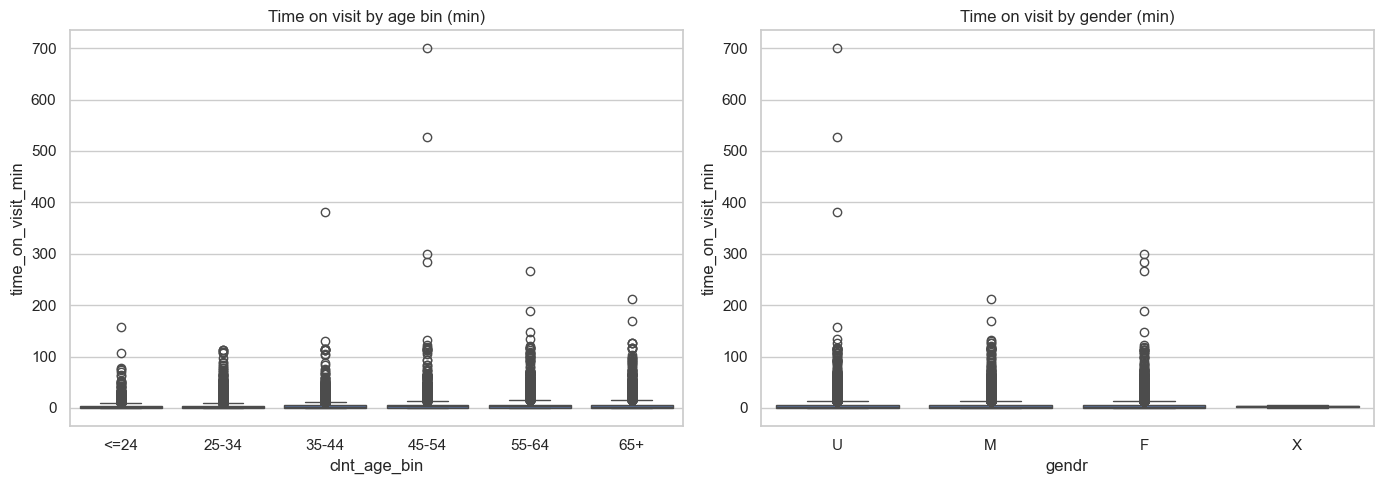

In [97]:
# Boxplots to visualize distribution of time_on_visit by age bin and gender

try:
    import seaborn as sns
    sns.set(style='whitegrid')
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    sns.boxplot(x='clnt_age_bin', y='time_on_visit_min', data=visit_times, ax=axes[0])
    axes[0].set_title('Time on visit by age bin (min)')
    sns.boxplot(x='gendr', y='time_on_visit_min', data=visit_times, ax=axes[1])
    axes[1].set_title('Time on visit by gender (min)')
    plt.tight_layout()
    plt.show()
except Exception:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    visit_times.boxplot(column='time_on_visit_min', by='clnt_age_bin', ax=axes[0])
    axes[0].set_title('Time on visit by age bin (min)')
    axes[0].set_xlabel('age bin')
    visit_times.boxplot(column='time_on_visit_min', by='gendr', ax=axes[1])
    axes[1].set_title('Time on visit by gender (min)')
    axes[1].set_xlabel('gender')
    plt.suptitle('')
    plt.tight_layout()

plt.show()